### Filters applying Pt. 2. Mean Geometric filter.

Mean geometric filter is used for smoothing and removing noises. It is most commonly used for smoothing Gaussian noise.
It helps to remove noise with less data loss.

    Algorithm:
        Moving kernel through each pixel of source image, and computing multiplicatoin of each source image pixels that are locateed in the kernel neighborhood. The result of multiplication shold be powered to 1 / kernel_size.

    Example:                kernel_size = 9
        5   16  22
        6   3   18
        12  3   15 ==> (5 * 16 * 22 * 6 * 3 * 18 * 12 * 3 * 15) ^ (1 / 9) = 8.77

In [53]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random as rd


def noisedImage(source_image, noise_percent):
    read, green, blue = (255, 0, 0), (0, 255, 0), (0, 0, 255)
    rgb = [read, green, blue]
    
    threshold = 1 - noise_percent
    
    output_image = np.zeros(source_image.shape, np.uint8)
    
    for i in range(source_image.shape[0]):
        for j in range(source_image.shape[1]):
            rand = rd.random()
            
            if rand > threshold:
                output_image[i][j] = rd.choice(rgb)
            else:
                output_image[i][j] = source_image[i][j]
                
    return output_image 


def displayImage(image, color_mode = None):
    plt.imshow(image, color_mode)
    plt.axis('off')

Generate noise on image and display it.

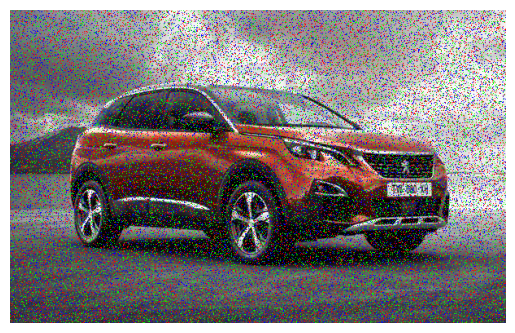

In [54]:
image_path = '../03.jpg'

source_image = cv2.imread(image_path, 1)
rgb_source_image = cv2.cvtColor(source_image.copy(), cv2.COLOR_BGR2RGB)

noised_image = noisedImage(rgb_source_image.copy(), 0.23)

displayImage(noised_image)


Mean Geometric filter implementation.

In [55]:
def meanGeometric(noised_image):
    res = np.zeros(noised_image.shape, np.uint8)
    
    for i in range(1, noised_image.shape[0] - 1):
        for j in range(1, noised_image.shape[1] - 1):
            kernel = noised_image[i - 1:i+2, j-1:j+2]
            kernel = kernel.astype(np.float64)
            
            kernel_prod = np.prod(kernel)
            res[i-1, j-1] = kernel_prod ** (1 / (kernel.shape[0] * kernel.shape[1]))

    return res


def rgbMeanGeometric(image):
    read, green, blue = cv2.split(image)
    
    read = meanGeometric(read)
    green = meanGeometric(green)
    blue = meanGeometric(blue)
    
    return cv2.merge([read, green, blue])            

Remove noise on the image with Mean Geometric filter and display it.

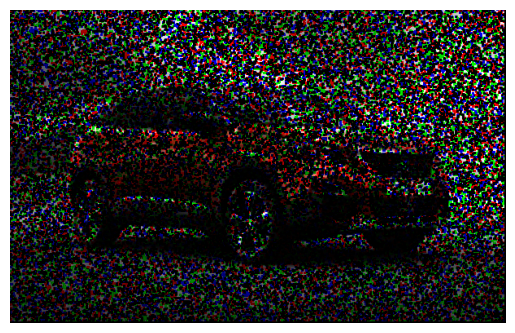

In [56]:
unnoised_image = rgbMeanGeometric(noised_image)

displayImage(unnoised_image)